In [3]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'twitter-depression-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1517327%2F2513240%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240204%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240204T034326Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D222e2515aa5dcdd00df3d4c8b499326d9b79819e12092e44844828cf4d04cc372532941a94ca9052e4c91667f533ce4fbb0d30f202ea9eae913c2f5740b07e11692e0624511559bc75ad79ac5fe00a6f20f346db5f8ebac3d566f067df14646ed475234760fef4e1454a2dc2f672c412a0f879eada6f2af923fb070645f750d964f16648288022b65926239db64b2bad75324cef2973aea163ad03b92a06c3c4ba8cf4434803d58afad62668edfc7234ccddd96b0f423d3e0cf0af9725b871adbed726a854bb0f2bc19d6c5769143d2fe1bd91d24379301b30a8674dc3728682db7a37c904a52c08b4a0592c0a1a86f73d007707a111b5d13d2aa6a27a5d8f44'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1482525 bytes downloaded
Downloaded and uncompressed: twitter-depression-dataset
Data source import complete.


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-depression-dataset/non_d_tweets.csv
/kaggle/input/twitter-depression-dataset/clean_d_tweets.csv
/kaggle/input/twitter-depression-dataset/clean_non_d_tweets.csv
/kaggle/input/twitter-depression-dataset/d_tweets.csv


In [5]:
tweets_df= pd.read_csv('../input/twitter-depression-dataset/clean_d_tweets.csv')
tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1261623711502753792,1261623711502753792,1.589630e+12,2020-05-16 01:45:07,-1000,NaN,the real reason why you be sad you be attach t...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1255537912491343872,1255537912491343872,1.588179e+12,2020-04-29 06:42:19,-1000,NaN,my biggest problem be overthinking everything,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1255524270521761792,1255524270521761792,1.588175e+12,2020-04-29 05:48:07,-1000,NaN,the worst sadness be the sadness you have teac...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1255524059334365186,1255524059334365186,1.588175e+12,2020-04-29 05:47:16,-1000,NaN,i cannot make you understand i cannot make any...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1172463022100512769,1172463022100512769,1.568372e+12,2019-09-13 00:52:22,-1000,NaN,i do not think anyone really understand how ti...,en,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# DATA CLEANING****

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3082 non-null   int64  
 1   conversation_id  3082 non-null   int64  
 2   created_at       3082 non-null   float64
 3   date             3082 non-null   object 
 4   timezone         3082 non-null   int64  
 5   place            0 non-null      float64
 6   tweet            3075 non-null   object 
 7   language         3082 non-null   object 
 8   hashtags         3082 non-null   object 
 9   cashtags         3082 non-null   object 
 10  user_id          3082 non-null   int64  
 11  user_id_str      3082 non-null   int64  
 12  username         3082 non-null   object 
 13  name             3082 non-null   object 
 14  day              3082 non-null   int64  
 15  hour             3082 non-null   int64  
 16  link             3082 non-null   object 
 17  urls          

In [7]:
cleaned_df=tweets_df.drop(['place','near','geo','source','user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src','trans_dest'],axis=1)

In [8]:
cleaned_df.dropna

<bound method DataFrame.dropna of                        id      conversation_id    created_at  \
0     1261623711502753792  1261623711502753792  1.589630e+12   
1     1255537912491343872  1255537912491343872  1.588179e+12   
2     1255524270521761792  1255524270521761792  1.588175e+12   
3     1255524059334365186  1255524059334365186  1.588175e+12   
4     1172463022100512769  1172463022100512769  1.568372e+12   
...                   ...                  ...           ...   
3077  1181274399019651072  1181274399019651072  1.570473e+12   
3078  1181029457999450114  1181029457999450114  1.570414e+12   
3079  1180747827359539200  1180747827359539200  1.570347e+12   
3080  1178886862665965568  1178886862665965568  1.569904e+12   
3081  1178474758762942464  1178474758762942464  1.569805e+12   

                     date  timezone  \
0     2020-05-16 01:45:07     -1000   
1     2020-04-29 06:42:19     -1000   
2     2020-04-29 05:48:07     -1000   
3     2020-04-29 05:47:16     -1000   
4 

In [9]:
cleaned_df.drop("timezone", axis=1, inplace=True)
cleaned_df.drop("retweet", axis=1, inplace=True)

In [10]:
cleaned_df.corr(numeric_only=True)  # Set to True if you want to include only numeric columns

,id,conversation_id,created_at,user_id,user_id_str,day,hour,video,nlikes,nreplies,nretweets
id,1.000000,1.000000,1.000000,0.147107,0.147107,0.008385,0.246014,-0.017338,0.395505,0.208770,0.181369
conversation_id,1.000000,1.000000,1.000000,0.147107,0.147107,0.008385,0.246014,-0.017338,0.395505,0.208770,0.181369
created_at,1.000000,1.000000,1.000000,0.147107,0.147107,0.008385,0.246014,-0.017338,0.395505,0.208770,0.181369
user_id,0.147107,0.147107,0.147107,1.000000,1.000000,-0.068604,-0.156960,0.087128,-0.278897,-0.184181,-0.234989
user_id_str,0.147107,0.147107,0.147107,1.000000,1.000000,-0.068604,-0.156960,0.087128,-0.278897,-0.184181,-0.234989
day,0.008385,0.008385,0.008385,-0.068604,-0.068604,1.000000,0.009066,-0.030526,0.031620,0.038834,0.023795
hour,0.246014,0.246014,0.246014,-0.156960,-0.156960,0.009066,1.000000,0.006374,0.043240,-0.017361,-0.046665
video,-0.017338,-0.017338,-0.017338,0.087128,0.087128,-0.030526,0.006374,1.000000,-0.079924,-0.028037,-0.071117
nlikes,0.395505,0.395505,0.395505,-0.278897,-0.278897,0.031620,0.043240,-0.079924,1.000000,0.691488,0.863652
nreplies,0.208770,0.208770,0.208770,-0.184181,-0.184181,0.038834,-0.017361,-0.028037,0.691488,1.000000,0.724119


In [11]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3082.0,9.176925e+17,3.668862e+17,3.002418e+17,6.725266e+17,8.975784e+17,1.269792e+18,1.424386e+18
conversation_id,3082.0,9.176925e+17,3.668862e+17,3.002418e+17,6.725266e+17,8.975784e+17,1.269792e+18,1.424386e+18
created_at,3082.0,1.507630e+12,8.747249e+10,1.360418e+12,1.449178e+12,1.502834e+12,1.591577e+12,1.628435e+12
user_id,3082.0,2.518460e+17,3.895333e+17,6.249536e+08,1.012825e+09,1.566319e+09,7.383969e+17,1.177688e+18
user_id_str,3082.0,2.518460e+17,3.895333e+17,6.249536e+08,1.012825e+09,1.566319e+09,7.383969e+17,1.177688e+18
day,3082.0,3.956197e+00,1.978387e+00,1.000000e+00,2.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00
hour,3082.0,1.217748e+01,6.477933e+00,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
video,3082.0,4.380273e-02,2.046891e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
nlikes,3082.0,1.478410e+03,3.046911e+03,0.000000e+00,1.000000e+01,5.350000e+01,1.459500e+03,3.234500e+04
nreplies,3082.0,3.938027e+00,1.100761e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.190000e+02



# DATA PROCESSING

In [12]:
!pip install textblob
from textblob import TextBlob
from textblob import Word

In [13]:
#converting tweet to lower case text
cleaned_df["tweet"] = cleaned_df["tweet"].apply(lambda x: " ".join(str(x).lower().split()) if pd.notnull(x) else '')

In [14]:
#removing numeric values
cleaned_df["tweet"] = cleaned_df["tweet"].str.replace("\d", "", regex=True)

In [15]:
#removing punctations
cleaned_df["tweet"] = cleaned_df["tweet"].str.replace("[^\w\s]","",regex=True)

In [23]:
#stop words
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")
cleaned_df["tweet"] = cleaned_df["tweet"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#lemmatization
nltk.download("wordnet")
nltk.download("omw-1.4")
cleaned_df["tweet"] = cleaned_df["tweet"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('feel', 238), ('like', 228), ('want', 201), ('go', 156), ('someone', 152), ('people', 148), ('know', 147), ('make', 132), ('get', 132), ('one', 118)]


<Axes: >

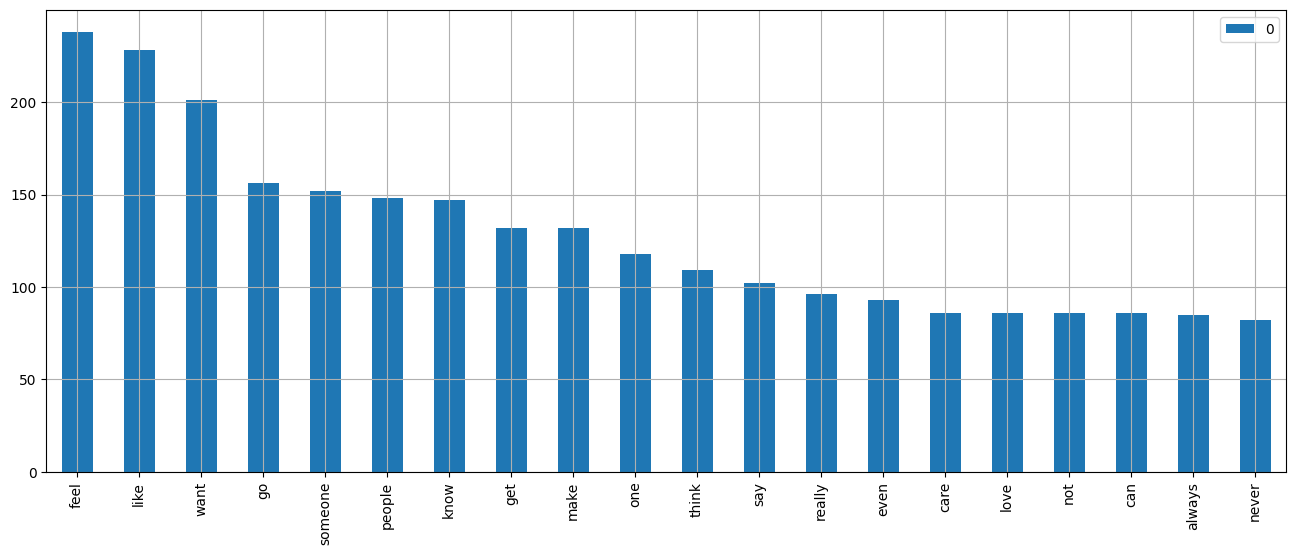

In [25]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
text_list = []
for index, row in cleaned_df.iterrows():
 text_list.append((row['tweet']))

total_words = ''.join(text_list)
total_words = word_tokenize(total_words)
freq_words = FreqDist(total_words)
word_frequency = FreqDist(freq_words)
print(word_frequency.most_common(10))
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

# Visualization

#

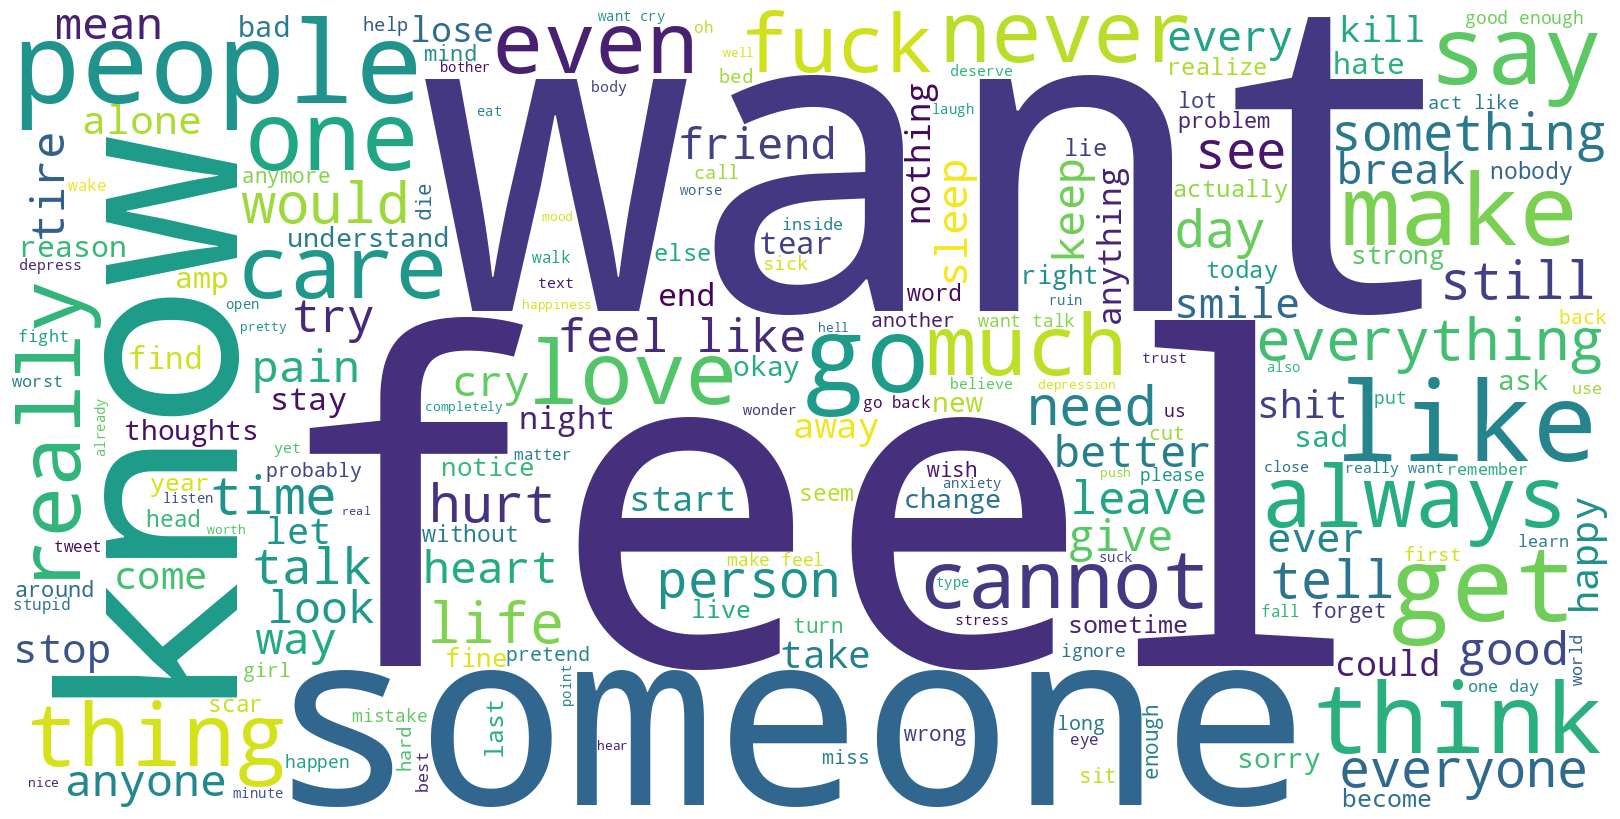

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_common_words=[]
for index, row in cleaned_df.iterrows():
    word_cloud_common_words.append((row['tweet']))

wordcloud = WordCloud(
    width = 1600, height = 800,
    background_color ='white',
    stopwords = sw,
    min_font_size = 5).generate(''.join(word_cloud_common_words))

# plot the WordCloud image
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [27]:
#Top 10 most common words
from collections import Counter
text = ' '.join(word_cloud_common_words)
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    print(f'{word}: {count}')

feel: 329
want: 308
like: 271
go: 206
people: 205
know: 195
someone: 182
one: 175
think: 159
get: 158


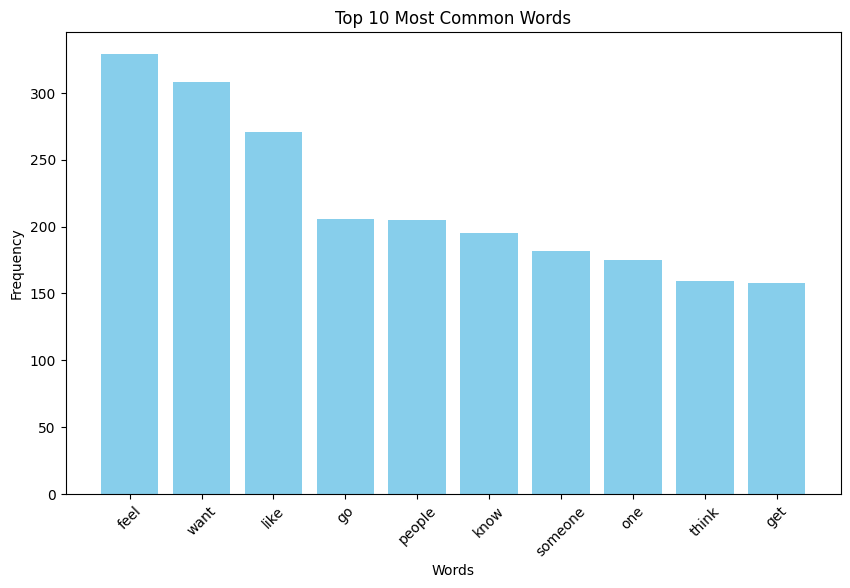

In [28]:
top_10_words = dict(word_counts.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values(), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

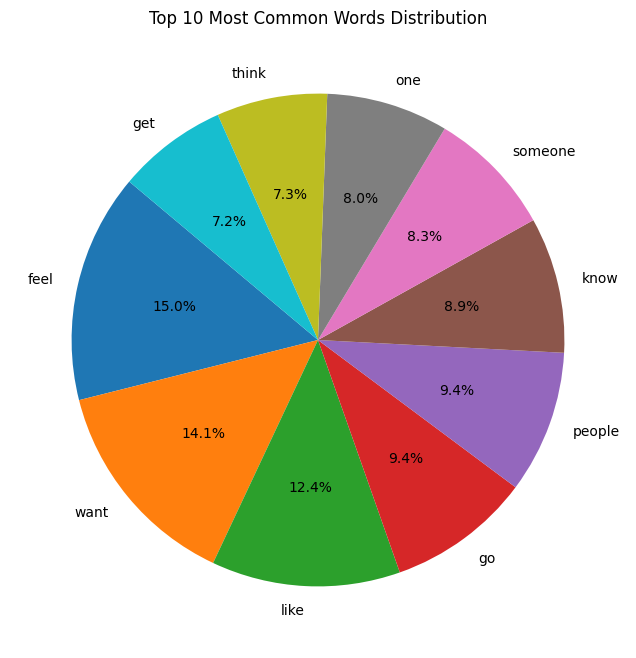

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_words.values(), labels=top_10_words.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Words Distribution')
plt.show()

In [30]:
cleaned_df.date=cleaned_df.date.apply(pd.to_datetime)

cleaned_df["month"]=cleaned_df.date.dt.month
cleaned_df["year"]=cleaned_df.date.dt.year

cleaned_df.drop("date",axis=1, inplace=True)

In [31]:
tweets_per_month = cleaned_df.groupby(['year', 'month']).size().reset_index(name='tweet_count')
print(tweets_per_month)

    year  month  tweet_count
0   2013      2          240
1   2013      3          193
2   2013      8           71
3   2013      9           13
4   2013     10           10
..   ...    ...          ...
87  2021      4           81
88  2021      5           59
89  2021      6           41
90  2021      7           53
91  2021      8           23

[92 rows x 3 columns]


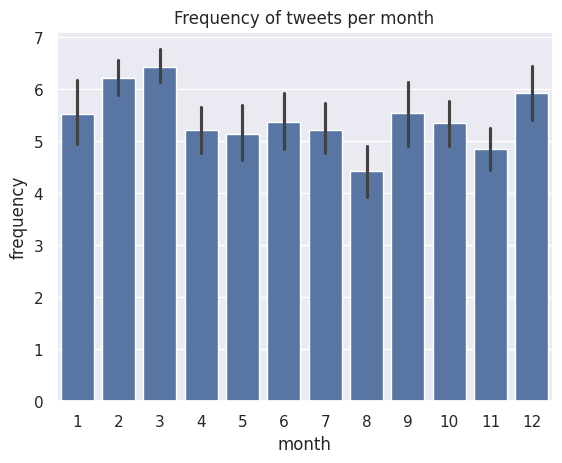

In [32]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (11, 5)})
cleaned_df["frequency"] = cleaned_df["tweet"].apply(lambda x: len(str(x).split(" ")))
# Plotting the bar plot
sns.barplot(data=cleaned_df, x="month", y="frequency").set(title="Frequency of tweets per month")
plt.show()

In [33]:
tweets_per_year = cleaned_df.groupby('year').size().reset_index(name='tweets_per_year')
print(tweets_per_year)

   year  tweets_per_year
0  2013              539
1  2014               37
2  2015              221
3  2016              316
4  2017              580
5  2018              216
6  2019              255
7  2020              360
8  2021              558


<ipython-input-34-585790971655>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tweets_per_year, x="year", y="tweets_per_year", palette="viridis").set(title="Number of Tweets per Year")


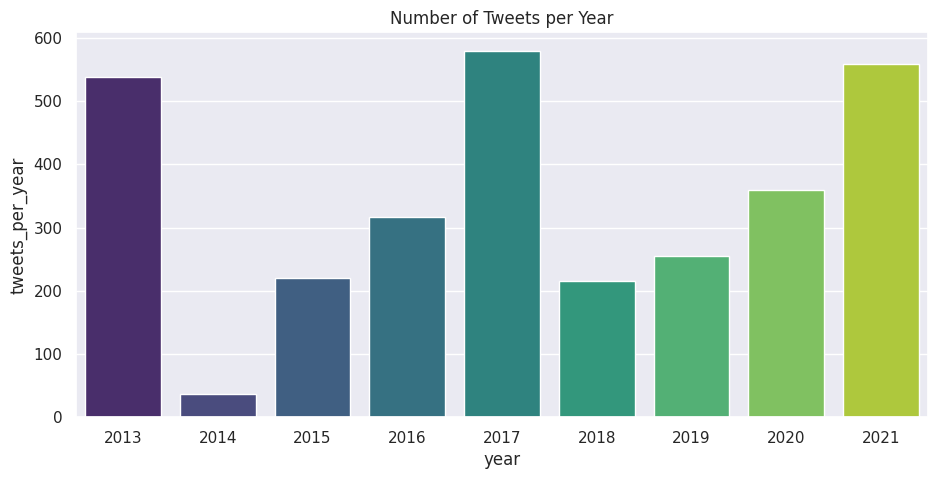

In [34]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale=0.5, rc={"grid.linewidth": 0.6})
sns.set(rc={'figure.figsize': (10, 6)})
sns.barplot(data=tweets_per_year, x="year", y="tweets_per_year", palette="viridis").set(title="Number of Tweets per Year")
plt.show()

# Sentimental Analysis

In [35]:
#sentiment analysis

!pip install vaderSentiment


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
cleaned_df['compound_score'] = cleaned_df['tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

cleaned_df['sentiment'] = cleaned_df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(cleaned_df[['tweet', 'compound_score', 'sentiment']])


                                                  tweet  compound_score  \
0     real reason sad attach people distant pay atte...          0.1027   
1               biggest problem overthinking everything         -0.4019   
2                      worst sadness sadness teach hide         -0.8910   
3     cannot make understand cannot make anyone unde...          0.0000   
4     think anyone really understand tire act okay a...          0.6369   
...                                                 ...             ...   
3077                             cough sneeze tho worst         -0.6249   
3078                                    sad whore ahaha         -0.8126   
3079                                bro feel get sneeze          0.0000   
3080                                     long piss best          0.3612   
3081                               dwight ignorant slut         -0.7096   

     sentiment  
0     positive  
1     negative  
2     negative  
3      neutral  
4     positive

In [36]:
#Frequency Analysis (CountVectorizer and TF-IDF(Term Frequency-Inverse Document Frequency))
from sklearn.feature_extraction.text import CountVectorizer
cleaned_df['tokenized_words'] = cleaned_df['tweet'].apply(word_tokenize)
cleaned_df['tokenized_words'] = cleaned_df['tokenized_words'].apply(lambda x: ' '.join(x))
count_vectorizer = CountVectorizer()
count_vectorized_data = count_vectorizer.fit_transform(cleaned_df['tokenized_words'])

print(type(count_vectorized_data), count_vectorized_data.shape)
print(cleaned_df.head())

<class 'scipy.sparse._csr.csr_matrix'> (3082, 2170)
                    id      conversation_id    created_at  \
0  1261623711502753792  1261623711502753792  1.589630e+12   
1  1255537912491343872  1255537912491343872  1.588179e+12   
2  1255524270521761792  1255524270521761792  1.588175e+12   
3  1255524059334365186  1255524059334365186  1.588175e+12   
4  1172463022100512769  1172463022100512769  1.568372e+12   

                                               tweet language hashtags  \
0  real reason sad attach people distant pay atte...       en       []   
1            biggest problem overthinking everything       en       []   
2                   worst sadness sadness teach hide       en       []   
3  cannot make understand cannot make anyone unde...       en       []   
4  think anyone really understand tire act okay a...       en       []   

  cashtags     user_id  user_id_str        username  ... nreplies  nretweets  \
0       []  1012824523   1012824523  depressingmsgs  ...

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = \
    train_test_split(count_vectorized_data, cleaned_df['sentiment'], test_size=0.3, random_state=42)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((2157, 2170), (2157,), (925, 2170), (925,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,y_train)
print(accuracy_score(model.predict(X_val),y_val) * 100)

78.48648648648648


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vectorized_data = tfidf.fit_transform(cleaned_df['tweet'])
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(tfidf_vectorized_data, cleaned_df['sentiment'], test_size=0.3, random_state=42)
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_tfidf = model_tfidf.predict(X_val_tfidf)
accuracy_tfidf = accuracy_score(predictions_tfidf, y_val_tfidf) * 100
print("TF-IDF Accuracy:", accuracy_tfidf)

TF-IDF Accuracy: 73.40540540540542
